# **Proyecto 2 Modelos de clasificación supervisada para evaluar la calidad de un automovil**
---

En el presente informe se evalua el problema de la evaluación de calidad de automóviles se refiere a la tarea de clasificar la calidad de un automóvil en función de diferentes atributos o características. Estos atributos pueden incluir el precio de compra, el costo de mantenimiento, el número de puertas, la capacidad de pasajeros, el tamaño del maletero, y el nivel de seguridad, entre otros. El objetivo es predecir la calidad del automóvil, que generalmente se representa como una variable categórica con diferentes niveles como "inaceptable", "aceptable", "bueno" o "muy bueno", utilizando modelos de aprendizaje automático supervisado. Este problema es relevante en la industria automotriz para ayudar a los consumidores a tomar decisiones informadas sobre la compra de un automóvil y para que los fabricantes mejoren la calidad de sus productos.

### Equipo de trabajo

- Marcela Vásquez
- Omar Avendaño
- Duván Robayo


En la siguiente celda se importan las librerías necesarias para el análisis de datos y la construcción de modelos de aprendizaje automático: **pandas, numpy, matplotlib, seaborn, sci-kit learn, prince y imblearn**.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from prince import MCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## **0.  Leer el archivo de datos**
---

Vamos a utilizar el dataset winequality-red.csv que se encuentra en un repositorio en línea y lo cargaremos en el dataframe data.

In [2]:
#OPCION 1 CARGAMOS EL DATASET DESDE EL ARCHIVO EN LA WEB
#1 Usamos el método read_csv que permite leer archivos csv como un dataframe de pandas.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
nombres_columnas = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv(url, names=nombres_columnas)
df.to_csv("cars.csv", index=False)

In [3]:
# OPCIÓN 2 CARGAMOS DESDE EL DATASET LOCAL
df = pd.read_csv("cars.csv")

In [3]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres primeras filas usando .head().

df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [4]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres últimas filas, usando tail(), esto con el fin de revisar previamente la variabilidad de los datos

df.tail(3)

,buying,maint,doors,persons,lug_boot,safety,class
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


## **1. Tipos de variables**
---
En esta sección haremos una revisión de las variables existentes en el dataframe y una descripción detallada de cada una de las columnas.

In [5]:
# REVISIÓN DE LA FORMA DEL DATAFRAME (CANTIDAD DE FILAS Y CANTIDAD DE COLUMNAS)
# Vamos a revisar el número de filas y columnas del dataframe, para saber con qué cantidad de información contamos.
# Usamos el método .shape

print(f"El número de filas del dataset es de: {df.shape[0]}")
print(f"El número de columnas del dataset es de: {df.shape[1]}")

El número de filas del dataset es de: 1728
El número de columnas del dataset es de: 7


### **1.1.  Tipos de datos de las columnas y registros nulos**

Se identifica las columnas, se hace una revisión de la cantidad de datos no nulos y el tipo de dato por cada columna.

In [6]:
# REVISIÓN GENERAL DEL DATAFRAME
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Determinamos la cantidad de variables y registros. Y el tipo de variables si son numericas o cualitativas

In [7]:
num_variables = len(df.columns)
num_registros = len(df)

numericas = df.select_dtypes(include='number').columns.tolist()
cualitativas = df.select_dtypes(exclude='number').columns.tolist()

print("Cantidad de variables:", num_variables)
print("Cantidad de registros:", num_registros)
print("Variables numéricas:", numericas)
print("Variables cualitativas:", cualitativas)

Cantidad de variables: 7
Cantidad de registros: 1728
Variables numéricas: []
Variables cualitativas: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


**Notas:**
- Se evidencian un solo tipo de datos (Object)
- Se observa todas las variables están completas al no tener registros nulos, de los 1728 registros, todas las variables cuentan con datos válidos.
- Preliminarmente se puede observar que todas las variables son Cualitativas.

### **1.2.  Revisión estadística de las variables**

Se identifica por cada variable la cantidad de valores unicos, el valor más repetido y su frecuencia.

In [8]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS
# El método describe nos permite traer varias medidas como: valores únicos, el valor más frecuente.

df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


**Notas:**
- Hay un total de 1728 registros en el conjunto de datos.
- Las variables "buying", "maint", "doors", "persons", "lug_boot", "safety" y "class" tienen respectivamente 4, 4, 4, 3, 3, 3 y 4 categorías únicas.
- Las categorías más comunes para cada variable son:
"buying": vhigh
"maint": vhigh
"doors": 2
"persons": 2
"lug_boot": small
"safety": low
"class": unacc
Estos datos nos dan una idea inicial de la distribución y la frecuencia de las diferentes categorías en nuestro conjunto de datos.

### **1.3.  Diccionario de datos**

Se describen cada una de las columnas presentes en este dataframe, proponiendo un nuevo nombre, la definición de estas variables, los valores ejemplo que toman los campos de estas columnas, los tipos de datos y tipos de variable.

El conjunto de datos de df cuenta con las siguientes variables:

| Variable  | Nuevo Nombre      | Definición	                           | Valores       | Tipo de Dato en Python | Tipo de Variable    |
|:---------:|:-----------------:|:-----------------------------------------|:-------------:|:----------------------:|:-------------------:|
| buying    | Precio            | Clasificación por precio.                | "vhigh", ...  | String                 | Categórica(nominal) |
| maint     | Mantenimiento     | Clasificación por costo mantenimiento.   | "high" , ...  | String                 | Categórica(nominal) |
| doors     | NumPuertas        | Clasificación por número de puertas.     | "5more" , ... | String                 | Categórica(nominal) |
| persons   | Pasajeros         | Clasificación por número de pasajeros.   | "4", ...      | String                 | Categórica(nominal) |
| lug_boot  | Baul              | Clasificación por tamaño de baúl.        | "small" , ... | String                 | Categórica(nominal) |
| safety    | Seguridad         | Clasificación de la seguridad del carro. | "low"  , ...  | String                 | Categórica(nominal) |
| **class** | **Clasificacion** | **Clasificación general del vehículo**   | "good" , ...  | String                 | Categórica(nominal) |


### **1.4.  Cambios en columnas**

A continuación se realizan algunos ajustes al dataset con el fin de facilitar las operaciones.

In [9]:
# SIMPLIFACAMOS LOS NOMBRES DE COLUMNAS
# Antes de operar vamos a normalizar los nombres de las columnas para hacer las operaciones más sencillas y entender mejor las variables que estamos manejando.

df.rename(columns={"buying":"Precio","maint":"Mantenimiento","doors":"NumPuertas",
                            "persons":"Pasajeros", "lug_boot": "Baul", "safety": "Seguridad",
                            "class":"Clasificacion"}, inplace=True)

## **2. Análisis Exploratorio de Datos**
---
En esta sección haremos una comparación de cada una de las variables de este dataset, para identificar comportamientos en los datos y tendencias de los mismos por medio de gráficos que nos permitan evaluar las variables numéricas.

In [10]:
color1 = "#363432"
color2 = "#196774"
color3 = "#90A19D"
color4 = "#F0941F"
color5 = "#EF6024"
colores = [color1, color2, color3, color4, color5]

### **2.1.  Distribución de los datos**

A continuación generamos un lienzo con los histrogramas de frecuencias de cada una de las variables presentes en el dataframe.

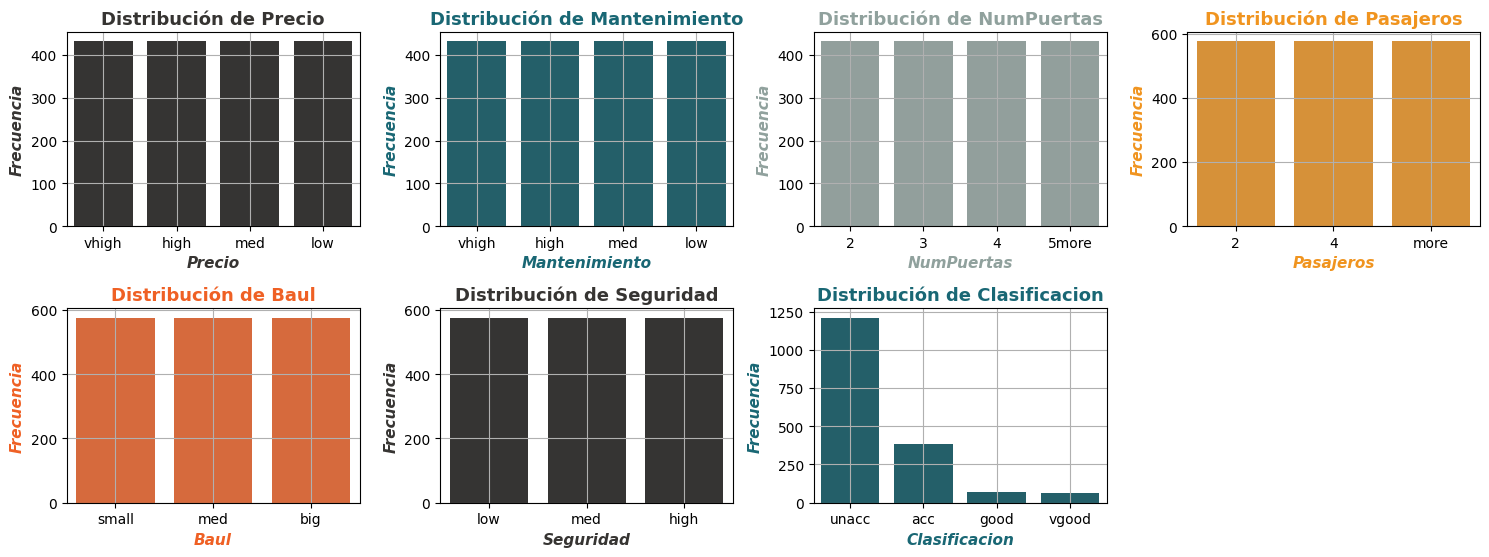

In [11]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(df.columns):
    if c > 4:
        c = 0
    plt.subplot(3, 4, i + 1)
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**

**Variables secundarias:**
Se puede observar que todas las variables tienen un equilibrio en la representación de las categorías, por lo que es posible que a estos datos se les hubiese aplicado una técnica de balanceo.

**Distribución de calificación general:**
Con respecto a la variable objetivo que determina la calidad de los vehículos podemos observar que existe mayor representación de vehículos considerados de calidad mala o inaceptable, con aproximadamente 1.200 registros, seguido de aceptable con alrededor de 380 registros. También es importante destacar que la clasificación de vehículos buenos y muy buenos solo representa 134 registros.

- Observamos que hay cuatro clases en la variable "class". La clase "unacc" (inaceptable) tiene la frecuencia más alta, seguida por "acc" (aceptable), "good" (buena) y "vgood" (muy buena). Sin embargo, hay una diferencia notable en la frecuencia entre las clases "unacc" y las otras clases. Esto indica un desequilibrio en la distribución de clases, donde la clase "unacc" es dominante en comparación con las demás.

- Dado que hay un desequilibrio significativo en la distribución de clases, es importante tener en cuenta este desequilibrio al entrenar un modelo de clasificación ya que los modelos pueden verse afectados y pueden tener dificultades para predecir correctamente las clases minoritarias. Es posible que se necesiten técnicas de manejo de clases desequilibradas, como el muestreo estratificado o la ponderación de clases, para abordar este problema y mejorar el rendimiento del modelo.


## **3. Codificación de variables**
---
En esta sección codificaremos las variables categóricas de nuestro dataframe original con el objetivo de mejorar el rendimiento de los modelos que vamos a realizar y poder realizar mejores análisis. Si bien, existen métodos de codificación como OneHotEncoder hemos decidido hacerlo manualmente con el fin de tener claros los números que reemplazarán las categorías.


In [12]:
dfCod = df.copy()

### **3.1.  Codificación Precio**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [13]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapPrecio = {"low": 0, "med": 1, "high": 2, "vhigh": 3}

# Reemplazamos los valores usando el método map.
dfCod["Precio"] = df["Precio"].map(mapPrecio)

### **3.2.  Codificación Mantenimiento**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [14]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapPrecio = {"low": 0, "med": 1, "high": 2, "vhigh": 3}

# Reemplazamos los valores usando el método map.
dfCod["Mantenimiento"] = df["Mantenimiento"].map(mapPrecio)

### **3.3.  Codificación NumPuertas**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [15]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapPuertas = {"2": 0, "3": 1, "4": 2, "5more": 3}

# Reemplazamos los valores usando el método map.
dfCod["NumPuertas"] = df["NumPuertas"].map(mapPuertas)

### **3.4.  Codificación Pasajeros**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [16]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapPasajeros = {"2": 0, "4": 1, "more": 2}

# Reemplazamos los valores usando el método map.
dfCod["Pasajeros"] = df["Pasajeros"].map(mapPasajeros)

### **3.5.  Codificación Baúl**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [17]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapBaul = {"small": 0, "med": 1, "big": 2}

# Reemplazamos los valores usando el método map.
dfCod["Baul"] = df["Baul"].map(mapBaul)

### **3.6.  Codificación Seguridad**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [18]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapSeguridad = {"low": 0, "med": 1, "high": 2}

# Reemplazamos los valores usando el método map.
dfCod["Seguridad"] = df["Seguridad"].map(mapSeguridad)

### **3.7.  Codificación Clasificación**

Realizamos la codificación de esta columna usando un mapeo que reemplace los valores.

In [19]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo.
mapClas = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}

# Reemplazamos los valores usando el método map.
dfCod["Clasificacion"] = df["Clasificacion"].map(mapClas)

In [20]:
dfCod.head(5)

,Precio,Mantenimiento,NumPuertas,Pasajeros,Baul,Seguridad,Clasificacion
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


## **4. Análisis de relaciones**
---
En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación.

**Nota:** Es importante tener en cuenta que la matriz de correlación es comúnmente utilizada para explorar la relación lineal entre variables numéricas, sin embargo como en este ejercicio solo tenemos variables categóricas vamos a usar otras correlaciones adecuadas para este tipo de dato.

### **4.1.  Tabla de contingencia múltiple**

También conocida como tabla de contingencia cruzada nos permite visualizar como se distribuyen las categorías de las variables y la variable objetivo.

In [21]:
tablaContingencia = pd.crosstab(index=[dfCod["Precio"], dfCod["Mantenimiento"], dfCod["NumPuertas"], dfCod["Pasajeros"],
                                       dfCod["Baul"], dfCod["Seguridad"]], columns=dfCod["Clasificacion"])

In [22]:
tablaContingencia.head(15)

Clasificacion                                             0  1  2  3
Precio Mantenimiento NumPuertas Pasajeros Baul Seguridad            
0      0             0          0         0    0          1  0  0  0
                                               1          1  0  0  0
                                               2          1  0  0  0
                                          1    0          1  0  0  0
                                               1          1  0  0  0
                                               2          1  0  0  0
                                          2    0          1  0  0  0
                                               1          1  0  0  0
                                               2          1  0  0  0
                                1         0    0          1  0  0  0
                                               1          0  1  0  0
                                               2          0  0  1  0
                                          1    0          1  0  0  0
                                               1          0  1  0  0
                                               2          0  0  1  0

### **4.2.  Análisis de correspondencia Múltiple (MCA)**

Este análisis nos permite explorar la estructura de las relaciones entre las variables categóricas, reduciendo la dimensionalidad de los datos y representarlos en dos dimensiones para visualizar y explorar las relaciones entre las categorías de variables.

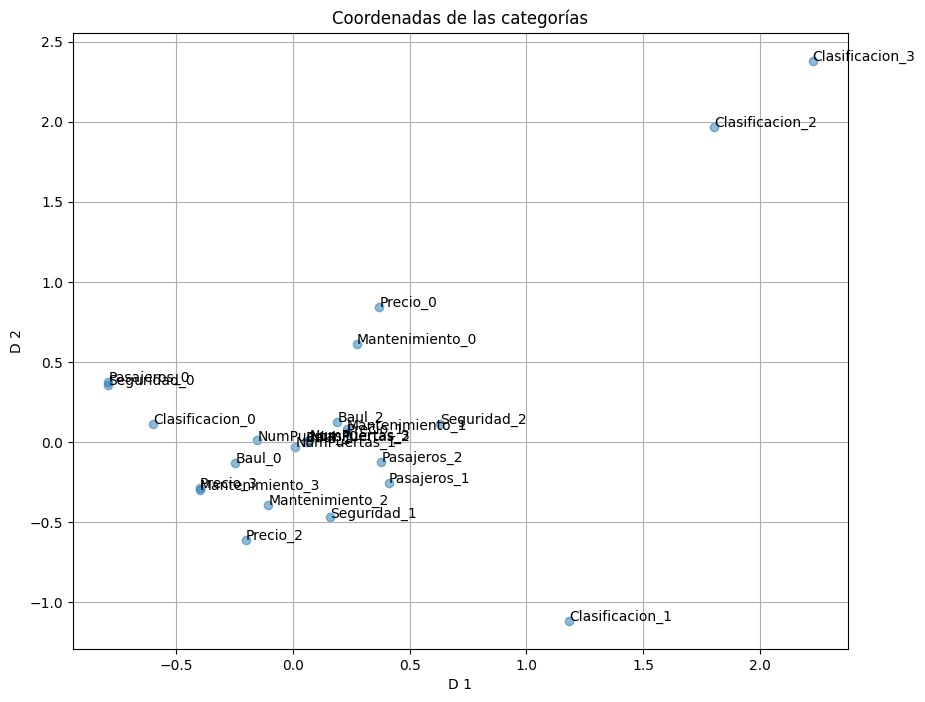

In [23]:
mca = MCA()
mca.fit(dfCod)

# Extraemos las coordenadas de las variables y las categorías
coordinates = mca.column_coordinates(dfCod)

# Graficamos las coordenadas en un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], alpha=0.5)
plt.xlabel('D 1')
plt.ylabel('D 2')
plt.title('Coordenadas de las categorías')
for i, txt in enumerate(coordinates.index):
    plt.annotate(txt, (coordinates.iloc[i, 0], coordinates.iloc[i, 1]))
plt.grid(True)
plt.show()

**Notas:**
- Se puede observar que las clasificaciones 2 y 3 ("good" y "vgood") tienen mayor fuerza de asoaciación aunque estén lejos del origen. Mientras que las calsificaciones 0 y 1 podrían tener asociaciones negativas.

- Se puede observar una alta asociación entre precio low y mantenimiento low.

- Existen varias variables que tienen una asoaciación alta ya que están muy cercanas en coordenadas, lo que podría significar similitud de características.

### **4.3.  Coeficiente de correlación de Spearman**

Este análisis nos permite explorar la estructura de las relaciones entre las variables categóricas, reduciendo la dimensionalidad de los datos y representarlos en dos dimensiones para visualizar y explorar las relaciones entre las categorías de variables.

In [24]:
# Calculamos el coeficiente de correlación de Spearman
spearmanCorr = dfCod.corr(method='spearman')
spearmanCorr


,Precio,Mantenimiento,NumPuertas,Pasajeros,Baul,Seguridad,Clasificacion
Precio,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.236949
Mantenimiento,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,-0.206508
NumPuertas,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.064560
Pasajeros,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.389372
Baul,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.137534
Seguridad,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.467165
Clasificacion,-0.236949,-0.206508,0.06456,0.389372,0.137534,0.467165,1.000000


In [25]:
coloresB = ["#8FC1B5", "#589A8D", "#007566", "#146551", "#265C4B"]

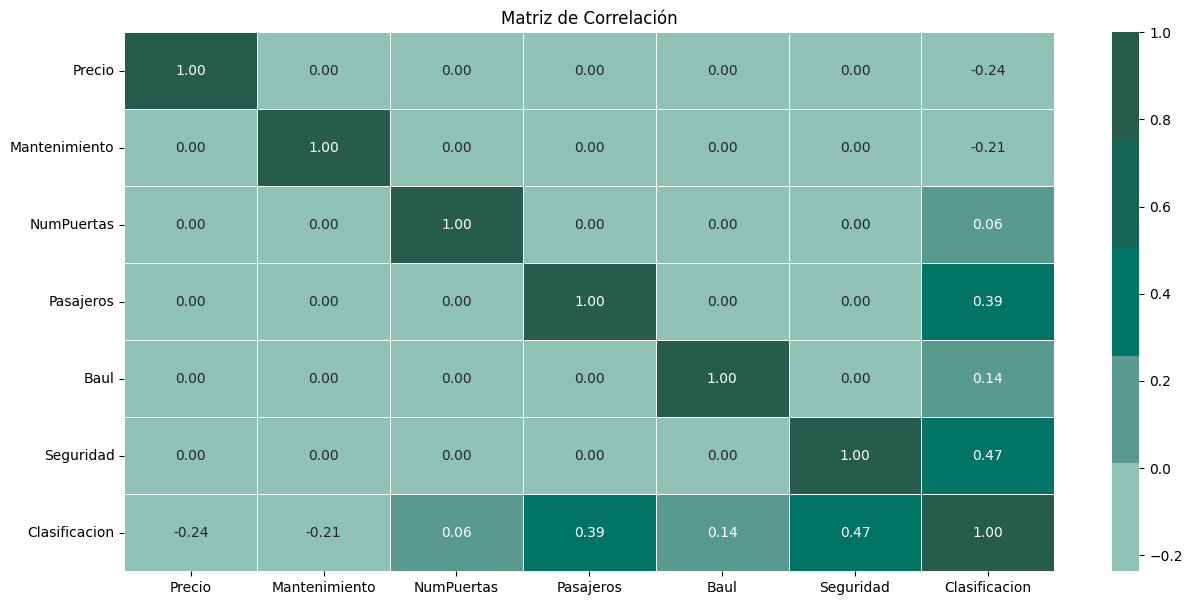

In [26]:
# Graficamos el coeficiente en un heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(spearmanCorr, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- Con respecto a la correlación de Spearman se podría indicar que la variables de seguridad y el número de pasajeros podrían tener mayor relación con la clasificación del vehículo, indicando una correlación de 0.47 y 0.39 respectivamente.

- Por otro lado el precio y el costo de mantenimiento podría indicar una correlación inversa aunque no tan significativa.

### **4.3.  Coeficiente de correlación usando Dummies**

En este análisis convertimos el dataframe original a variables dummies para observar si existen relaciones entre cada una de las categorías de las variables.

In [27]:
# Convertimos variables categóricas a variables dummies
dfDummie = pd.get_dummies(df)

# Calculamos la matriz de correlación
matrizCorrelacion = dfDummie.corr()

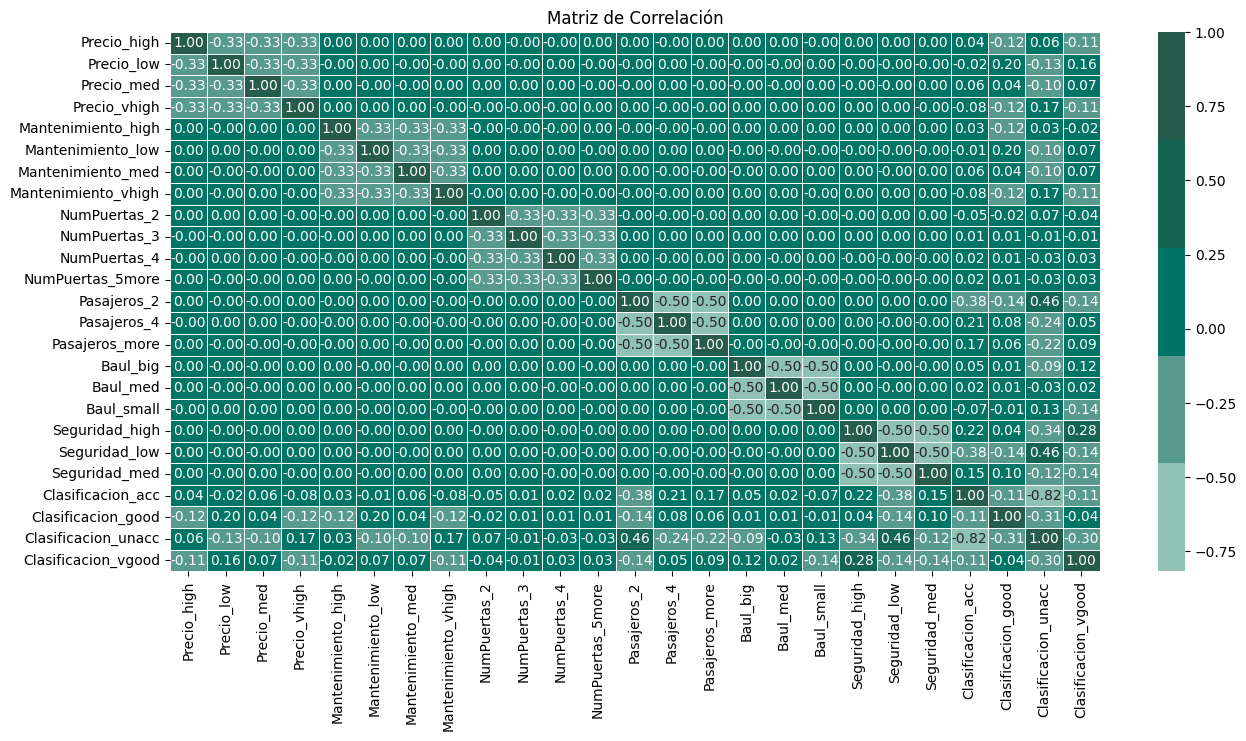

In [28]:
# Creamos un mapa de calor que nos permite identificar las relaciones entre los datos.
plt.figure(figsize=(15, 7))
sns.heatmap(matrizCorrelacion, annot=True, cmap=coloresB, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- Con respecto a la correlación realizada con dummies podemos evidenciar baja relación en la gran mayoría de categorías de variables.

- Revisando la variable objetivo de interés podemos observar que una clasificación muy baja puede tener relación con el número de pasajeros, especialmente carros con una ocupación de 2. También una calificación como baja puede tener relación con una clasificación inaceptable.

- Si revisamos las clasificaciones consideradas como muy buenas podemos ver una correlación positiva no tan significante con una seguridad alta. Por lo que podría decirse preliminarmente que una seguridad alta impactaría en una buena clasificación.

## **5. Preprocesamiento de datos**
---
Dado que la variable "class" está desequilibrada en el conjunto de datos, vamos a aplicar técnicas que puedan ayudar a abordar este desequilibrio para mejorar el rendimiento del modelo de clasificación. Vamos a entrenar modelos con 3 fuentes de datos de entrenamiento y testeo, con el fin de comporar estas técnicas y determinar si hay cambios en el rendimiento de los modelos.

### **5.1.  Sin ninguna técnica**

En esta sección dividiremos el conjunto de datos de entrenamiento y prueba sin ningún parametro adicional.

In [32]:
# Dividimos el conjunto de datos acorde a las carecterísticas y la variable objetivo.

X1 = dfCod.drop(columns=["Clasificacion"])
Y1 = dfCod["Clasificacion"]

# Dividimos el conjunto de datos en train y test.

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Revisamos las distribuciones
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train1.value_counts(normalize=True))
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test1.value_counts(normalize=True))

Distribución de clases en el conjunto de entrenamiento:
Clasificacion
0    0.705499
1    0.217800
2    0.041968
3    0.034732
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Clasificacion
0    0.679191
1    0.239884
3    0.049133
2    0.031792
Name: proportion, dtype: float64


### **5.2.  Muestre estratificado**

En esta sección dividiremos el conjunto de datos en subconjuntos estratificados, esto con el fin de garantizar que cada clase esté representada de manera equitativa tanto en el conjunto de entrenamiento como en el de prueba. También para evitar que el modelo se sesgue hacia las clases mayoritarias durante el entrenamiento.

In [33]:
# Dividimos el conjunto de datos acorde a las carecterísticas y la variable objetivo.

X2 = dfCod.drop(columns=["Clasificacion"])
Y2 = dfCod["Clasificacion"]

# Dividimos el conjunto de datos en train y test.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, stratify=Y2, random_state=42)

# Revisamos las distribuciones
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train2.value_counts(normalize=True))
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test2.value_counts(normalize=True))

Distribución de clases en el conjunto de entrenamiento:
Clasificacion
0    0.700434
1    0.222142
2    0.039797
3    0.037627
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Clasificacion
0    0.699422
1    0.222543
2    0.040462
3    0.037572
Name: proportion, dtype: float64


**Notas**

Observamos que la distribución de clases en los conjuntos de entrenamiento y prueba es consistente y refleja la distribución original de clases en los datos. Esto demuestra que la división estratificada ha mantenido la proporción de clases en ambos conjuntos, lo que es crucial para evitar sesgos en la evaluación del modelo.

### **5.3.  Híbrido: Sobremuestreo SMOTE y submuestreo aleatorio**

En esta sección aplicamos un sobremuestreo de los datos con menor representación y un sumbmuestreo de los datos con mayor representación para lograr un equilibrio en las categorías de la variable objetivo.

In [37]:
# Creamos el objeto SMOTE.
smote = SMOTE(random_state=42)

# Creamos una tubería que haga la transformación
pipe = Pipeline([
    ("oversample", SMOTE(sampling_strategy="auto", random_state=42)),
    ("undersample", RandomUnderSampler(sampling_strategy="auto", random_state=42))
])

# Aplicamos el pipe a los datos originales
X3, Y3 = pipe.fit_resample(X1, Y1)

# Dividimos en conjunto de datos en train y test.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Revisamos las distribuciones
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train3.value_counts(normalize=True))
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test3.value_counts(normalize=True))

Distribución de clases en el conjunto de entrenamiento:
Clasificacion
2    0.252324
3    0.252066
1    0.251550
0    0.244060
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Clasificacion
0    0.273760
1    0.243802
3    0.241736
2    0.240702
Name: proportion, dtype: float64


## **6. Creación y entrenamiento de modelos**
---
Luego de realizar el preprocesamiento entrenamos diferentes modelos de predicción de clasificación.

### **6.1.  Regresión logística multinomial**

En este caso vamos a usar un modelo de regresión logística múlticlase ya que nuestra variable objetivo tiene 4 categorías de salida y este modelo nos permite modelar la probabilidad de pertenencia a una de las 4 categorías existentes.

In [40]:
# Creamos el modelo usando el parametro multiclass de la clase LogisticRegression y usando el conjunto 1(sin ninguna técnica)
modeloReg1 = LogisticRegression(multi_class="multinomial", solver="lbfgs")

# Entrenamos el modelo 
modeloReg1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredReg1 = modeloReg1.predict(X_test1)

# Mostramos el reporte de clasificación
print(classification_report(y_test1, yPredReg1))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       235
           1       0.67      0.55      0.61        83
           2       0.67      0.36      0.47        11
           3       0.76      0.76      0.76        17

    accuracy                           0.81       346
   macro avg       0.74      0.65      0.68       346
weighted avg       0.80      0.81      0.80       346



In [41]:
# Creamos el modelo usando el parametro multiclass de la clase LogisticRegression y usando el conjunto 2(muestreo estratificado)
modeloReg2 = LogisticRegression(multi_class="multinomial", solver="lbfgs")

# Entrenamos el modelo 
modeloReg2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredReg2 = modeloReg2.predict(X_test2)

# Mostramos el reporte de clasificación
print(classification_report(y_test2, yPredReg2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       242
           1       0.61      0.55      0.58        77
           2       0.43      0.21      0.29        14
           3       0.78      0.54      0.64        13

    accuracy                           0.80       346
   macro avg       0.67      0.56      0.60       346
weighted avg       0.78      0.80      0.79       346



In [42]:
# Creamos el modelo usando el parametro multiclass de la clase LogisticRegression y usando el conjunto 3(híbrido)
modeloReg3 = LogisticRegression(multi_class="multinomial", solver="lbfgs")

# Entrenamos el modelo 
modeloReg3.fit(X_train3, y_train3)

# Realizamos las predicciones en el conjunto de prueba
yPredReg3 = modeloReg3.predict(X_test3)

# Mostramos el reporte de clasificación
print(classification_report(y_test3, yPredReg3))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       265
           1       0.79      0.70      0.74       236
           2       0.87      0.98      0.92       233
           3       0.92      0.96      0.94       234

    accuracy                           0.86       968
   macro avg       0.85      0.86      0.86       968
weighted avg       0.85      0.86      0.85       968



In [46]:
clases = list(df.Clasificacion.value_counts().index)

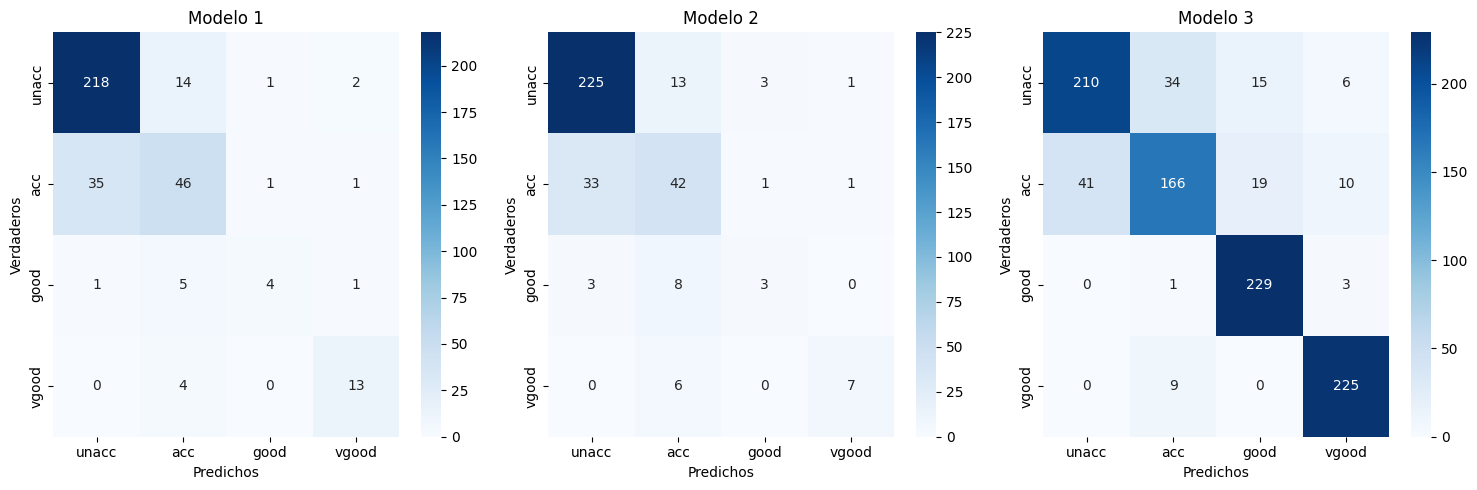

In [56]:
# Creamos un lienzo con tres subgráficos horizontales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generamos la matriz de confusión para el modelo 1
cm1 = confusion_matrix(y_test1, yPredReg1)
sns.heatmap(cm1, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[0])
axes[0].set_xlabel('Predichos')
axes[0].set_ylabel('Verdaderos')
axes[0].set_title("Modelo 1")

# Generamos la matriz de confusión para el modelo 2
cm2 = confusion_matrix(y_test2, yPredReg2)
sns.heatmap(cm2, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[1])
axes[1].set_xlabel('Predichos')
axes[1].set_ylabel('Verdaderos')
axes[1].set_title("Modelo 2")

# Generamos la matriz de confusión para el modelo 3
cm3 = confusion_matrix(y_test3, yPredReg3)
sns.heatmap(cm3, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[2])
axes[2].set_xlabel('Predichos')
axes[2].set_ylabel('Verdaderos')
axes[2].set_title("Modelo 3")

# Ajustamos el espacio entre subgráficos
plt.tight_layout()
# Mostramos el gráfico
plt.show()


**Notas:**

**Modelo Reg1:**

> - En cuanto a la precisión podemos observar que es más alta para precedir 0 (unacceptable), con un 86% de precisión. Sin embargo la precisión es más baja para las clases 1, 2 y 3 (0.67, 0.67, 0.76) lo que indica hay más falsos positivos en esas clases.
> - El recall es más alto en las clases 0 (0.93) y 3 (0.76), es decir mayor clasificación adecuada en estas clases. Sin embargo el recall es más bajo para las clases 1 y 2, lo que indica más falsos positivos para esas clases.
> - El F1-score es más bajo para las clases 1 y 2, lo que sugiere un rendimiento deficiente en estas clases.
> - La precisión global del modelo es de 81%, lo que indica que el 81% de los registros se clasifican bien.

**Modelo Reg2:**

> - En comparación con el modelo 1 podemos observar que las métricas de precisión, recall y f1 score son ligeramente más bajas, lo que sugeriría un rendimiento general ligeramente inferior.
> - Las métricas para las clases 1 y 2 son particularmente más bajas que en el modelo 1, lo que indica un mayor número de falsos positivos y falsos negativos en estas clases. 
> - La precisión global del modelo se reduce en un 1% con respecto al modelo 1.

**Modelo reg3:**

> - Este modelo parece tener un mejor rendimiento en comparación con los anteriores.
> - En cuanto a la precisión podemos observar que la precisión mejoró significativamente en las categorías que previamente no estaban equilibradas, con una precisión de 0.84, 0.79, 0.87 y 0.92 respectivamente, si bien se reduce un poco la precisión de la categoría unacceptable, podemos ver que mejora la precisión de las otras categorías.
> - Con el recall y el f1-score sucede lo mismo, podemos observar que para la variable 0 el recall disminuye, pero aumenta significativamente para las otras 3 variables.
> - Con respecto a la precisión global del modelo podemos observar una precisión del 86&, 5 puntos por encima que el modelo 1.

En resumen, el Modelo 3 parece ser el mejor entre los tres modelos en términos de métricas, seguido por el modelo 1 y el modelo 2. Es probable que el hecho de que el modelo 3 haya sido entrenado en un conjunto de datos equilibrado utilizando una técnica híbrida haya contribuido significativamente a un mayor rendimiento. Lo que ha reducido el sesgo hacia la clase dominante y mejorando el rendimiento para predecir las clases menos representadas.

### **6.2.  Arbol de decisión**

En este caso vamos a usar un modelo de Decision Tree Classifier que nos permite modelar la relación no lineal entre las características y la variable Clasificación que es la objetivo, construyendo una estructura de arbol de decisión.

In [58]:
# Creamos el modelo usando la clase DecisionTreeClassifier y usando el conjunto 1(sin ninguna técnica)
modeloArb1 = DecisionTreeClassifier()

# Entrenamos el modelo 
modeloArb1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredArb1 = modeloArb1.predict(X_test1)

# Mostramos el reporte de clasificación
print(classification_report(y_test1, yPredArb1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.97      0.90      0.94        83
           2       0.56      0.91      0.69        11
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



In [59]:
# Creamos el modelo usando la clase DecisionTreeClassifier y usando el conjunto 1(muestreo estratificado)
modeloArb2 = DecisionTreeClassifier()

# Entrenamos el modelo 
modeloArb2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredArb2 = modeloArb2.predict(X_test2)

# Mostramos el reporte de clasificación
print(classification_report(y_test2, yPredArb2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       0.96      0.94      0.95        77
           2       0.92      0.86      0.89        14
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



In [60]:
# Creamos el modelo usando la clase DecisionTreeClassifier y usando el conjunto 3(híbrido)
modeloArb3 = DecisionTreeClassifier()

# Entrenamos el modelo 
modeloArb3.fit(X_train3, y_train3)

# Realizamos las predicciones en el conjunto de prueba
yPredArb3 = modeloArb3.predict(X_test3)

# Mostramos el reporte de clasificación
print(classification_report(y_test3, yPredArb3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       265
           1       0.97      0.97      0.97       236
           2       0.98      0.97      0.98       233
           3       0.99      1.00      0.99       234

    accuracy                           0.98       968
   macro avg       0.98      0.98      0.98       968
weighted avg       0.98      0.98      0.98       968



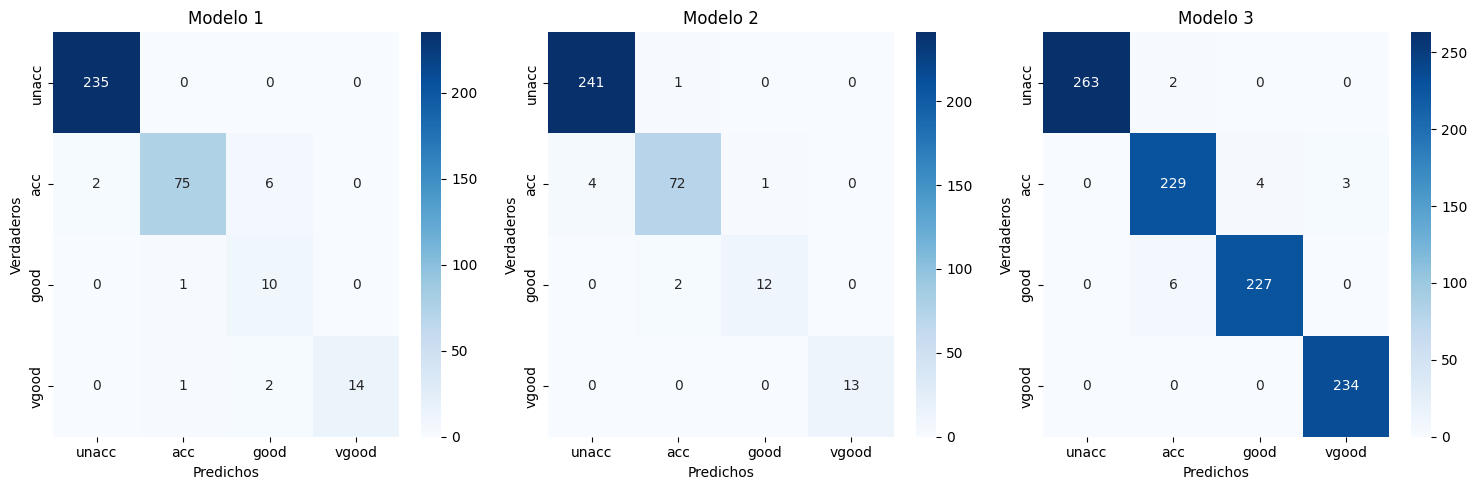

In [61]:
# Creamos un lienzo con tres subgráficos horizontales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generamos la matriz de confusión para el modelo 1
cm1 = confusion_matrix(y_test1, yPredArb1)
sns.heatmap(cm1, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[0])
axes[0].set_xlabel('Predichos')
axes[0].set_ylabel('Verdaderos')
axes[0].set_title("Modelo 1")

# Generamos la matriz de confusión para el modelo 2
cm2 = confusion_matrix(y_test2, yPredArb2)
sns.heatmap(cm2, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[1])
axes[1].set_xlabel('Predichos')
axes[1].set_ylabel('Verdaderos')
axes[1].set_title("Modelo 2")

# Generamos la matriz de confusión para el modelo 3
cm3 = confusion_matrix(y_test3, yPredArb3)
sns.heatmap(cm3, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[2])
axes[2].set_xlabel('Predichos')
axes[2].set_ylabel('Verdaderos')
axes[2].set_title("Modelo 3")

# Ajustamos el espacio entre subgráficos
plt.tight_layout()
# Mostramos el gráfico
plt.show()


**Notas:**

**Modelo Arb1:**

> - En cuanto a la precisión podemos observar que es alta para la mayoría de clases, especialmente para precedir 3, 0 y 1 (1, 0.99 y 0.97). Sin embargo la precisión es más baja para la clase 2 (0.56) lo que indica mayor presencia de falsos positivos en esa clase.
> - El recall es alto para la mayoría de las clases, aunque un poco más bajo para la clase 3 (0.82). Lo que sugiere en general una buena clasificación.
> - El F1-score es alto para la mayoría de clases, lo que indica un buen equilibrio entre precisión y recall. Aunque un f-core más bajo en la clase 2.
> - La precisión global del modelo es de 0.97, lo que indica que el 97% de los registros se clasifican bien.

**Modelo Arb2:**

> - En comparación con el modelo 1 podemos observar que las métricas de precisión, recall y f1 score son ligeramente más bajas, lo que sugeriría un rendimiento general ligeramente inferior. Sin embargo se observa una mejora sustancial en la clase 2.
> - La precisión global del modelo aumenta en un 1% con respecto al modelo 1, posiblemente por la mejora en las métricas de la clase 2.

**Modelo Arb3:**

> - Este modelo parece tener un mejor rendimiento en comparación con los anteriores.
> - En cuanto a la precisión podemos observar que la precisión mejoró significativamente en las categorías que previamente no estaban equilibradas, con una precisión entre 0.97 y 1.
> - Con el recall y el f1-score sucede lo mismo, podemos observar una mejora en las clasificaciones de cada una de las categorías.
> - Con respecto a la precisión global del modelo podemos observar una precisión del 98%, similar al modelo 2. Pero con un aumento siginficativo en las metricas por cada categorías.

- En resumen, los resultados de los tres modelos de arbol de decisión muestran un rendimiento general bastante sólido, con altas métricas de precisión, recall y f1-score para la mayoría de clases.

- El Modelo 3 parece ser ligeramente mejor entre los tres modelos en términos de métricas, seguido por el modelo 2 y el modelo 1.

- Es probable que el hecho de que el modelo 3 haya sido entrenado en un conjunto de datos equilibrado utilizando una técnica híbrida haya contribuido significativamente a un mayor rendimiento al menos en cada una de las categorías. Lo que ha reducido el sesgo hacia la clase dominante y mejorando el rendimiento para predecir las clases menos representadas.

### **6.2.  Bosque Aleatorio**

En este caso vamos a usar un modelo que consiste en un conjunto de arboles de decisión que se entrenan de manera independiente y posteriormente se combinan para realizar predicciones.

In [62]:
# Creamos el modelo usando la clase RandomForestClassifier y usando el conjunto 1(sin ninguna técnica)
modeloRan1 = RandomForestClassifier()

# Entrenamos el modelo 
modeloRan1.fit(X_train1, y_train1)

# Realizamos las predicciones en el conjunto de prueba
yPredRan1 = modeloRan1.predict(X_test1)

# Mostramos el reporte de clasificación
print(classification_report(y_test1, yPredRan1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.97      0.88      0.92        83
           2       0.56      0.91      0.69        11
           3       0.88      0.82      0.85        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.86       346
weighted avg       0.97      0.96      0.96       346



In [63]:
# Creamos el modelo usando la clase RandomForestClassifier y usando el conjunto 2(muestreo estratificado)
modeloRan2 = RandomForestClassifier()

# Entrenamos el modelo 
modeloRan2.fit(X_train2, y_train2)

# Realizamos las predicciones en el conjunto de prueba
yPredRan2 = modeloRan2.predict(X_test2)

# Mostramos el reporte de clasificación
print(classification_report(y_test2, yPredRan2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.96      0.93        77
           2       0.91      0.71      0.80        14
           3       0.79      0.85      0.81        13

    accuracy                           0.96       346
   macro avg       0.90      0.88      0.88       346
weighted avg       0.96      0.96      0.96       346



In [64]:
# Creamos el modelo usando la clase RandomForestClassifier y usando el conjunto 3(híbrido)
modeloRan3 = RandomForestClassifier()

# Entrenamos el modelo 
modeloRan3.fit(X_train3, y_train3)

# Realizamos las predicciones en el conjunto de prueba
yPredRan3 = modeloRan3.predict(X_test3)

# Mostramos el reporte de clasificación
print(classification_report(y_test3, yPredRan3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       265
           1       0.97      0.97      0.97       236
           2       0.97      0.99      0.98       233
           3       0.99      1.00      0.99       234

    accuracy                           0.98       968
   macro avg       0.98      0.98      0.98       968
weighted avg       0.98      0.98      0.98       968



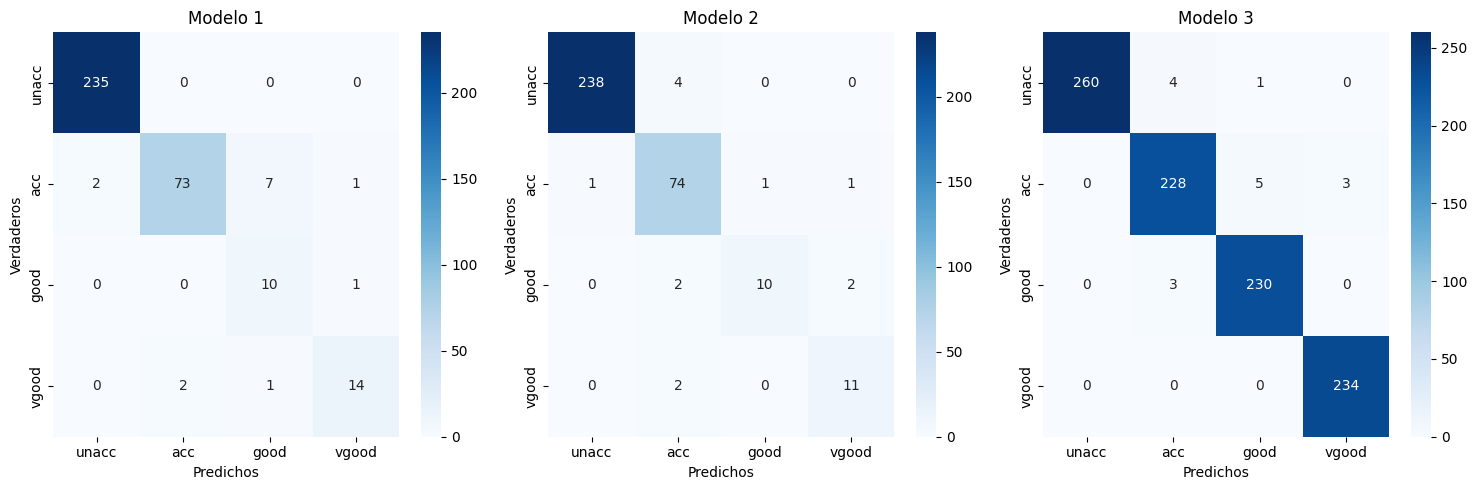

In [65]:
# Creamos un lienzo con tres subgráficos horizontales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generamos la matriz de confusión para el modelo 1
cm1 = confusion_matrix(y_test1, yPredRan1)
sns.heatmap(cm1, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[0])
axes[0].set_xlabel('Predichos')
axes[0].set_ylabel('Verdaderos')
axes[0].set_title("Modelo 1")

# Generamos la matriz de confusión para el modelo 2
cm2 = confusion_matrix(y_test2, yPredRan2)
sns.heatmap(cm2, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[1])
axes[1].set_xlabel('Predichos')
axes[1].set_ylabel('Verdaderos')
axes[1].set_title("Modelo 2")

# Generamos la matriz de confusión para el modelo 3
cm3 = confusion_matrix(y_test3, yPredRan3)
sns.heatmap(cm3, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[2])
axes[2].set_xlabel('Predichos')
axes[2].set_ylabel('Verdaderos')
axes[2].set_title("Modelo 3")

# Ajustamos el espacio entre subgráficos
plt.tight_layout()
# Mostramos el gráfico
plt.show()

**Notas:**

**Modelo Ran1:**

> - En cuanto a la precisión podemos observar que es alta para la mayoría de clases, especialmente para precedir 0, 1 y 3 (0.99, 0.97 Y 0.88). Sin embargo la precisión es más baja para la clase 2 (0.56) lo que indica mayor presencia de falsos positivos en esa clase.
> - El recall es alto para la mayoría de las clases, aunque un poco más bajo para la clase 3 (0.82). Lo que sugiere en general una buena clasificación.
> - El F1-score es alto para la mayoría de clases, lo que indica un buen equilibrio entre precisión y recall. Aunque un f-core más bajo en la clase 2.
> - La precisión global del modelo es de 0.96, lo que indica que el 96% de los registros se clasifican bien.

**Modelo Ran2:**

> - En comparación con el modelo 1 podemos observar que las métricas de precisión, recall y f1 score son ligeramente más bajas, lo que sugeriría un rendimiento general ligeramente inferior. Sin embargo se observa una mejora sustancial en la clase 2, de 0.56 a 0.92.
> - La precisión global del modelo es similar al modelo 1, pero con un mejor equilibrio en las predicciones por cada categoría.

**Modelo Ran3:**

> - Este modelo parece tener un mejor rendimiento en comparación con los anteriores.
> - En cuanto a la precisión podemos observar que la precisión mejoró significativamente en las categorías que previamente no estaban equilibradas, con una precisión entre 0.97 y 1.
> - Con el recall y el f1-score sucede lo mismo, podemos observar una mejora en las clasificaciones de cada una de las categorías.
> - Con respecto a la precisión global del modelo podemos observar una precisión del 98%, significativamente mejor al modelo 2. Pero con un aumento siginficativo en las metricas por cada categoría.

- En resumen, los resultados de los tres modelos de bosque aleatorio muestran un rendimiento general bastante sólido, con altas métricas de precisión, recall y f1-score para la mayoría de clases.

- El Modelo 3 parece ser ligeramente mejor entre los tres modelos en términos de métricas, seguido por el modelo 2 y el modelo 1.

- Es probable que el hecho de que el modelo 3 haya sido entrenado en un conjunto de datos equilibrado utilizando una técnica híbrida haya contribuido significativamente a un mayor rendimiento al menos en cada una de las categorías. Lo que ha reducido el sesgo hacia la clase dominante y mejorando el rendimiento para predecir las clases menos representadas.

## **7. Conclusiones**
---
Dado el análisis realizado sobre los tres tipos de modelos (Regresión Logística, Árbol de Decisión y Bosque Aleatorio), parece que el Modelo 3 de cada tipo de modelo tiende a mostrar un rendimiento superior en comparación con los Modelos 1 y 2. Esto puede deberse al hecho de que el Modelo 3 fue entrenado en un conjunto de datos equilibrado utilizando una técnica híbrida de sobre muestreo y submuestreo, lo que contribuyó significativamente a un mayor rendimiento al menos en cada una de las categorías.

Ahora, para elegir el mejor modelo entre los tres tipos (Regresión Logística, Árbol de Decisión y Bosque Aleatorio), es necesario considerar el rendimiento relativo de los Modelos 3 de cada tipo en comparación con los otros dos tipos.

- Para la Regresión Logística, el Modelo 3 mostró una mejora significativa en términos de precisión, recall y F1-score en comparación con los Modelos 1 y 2, lo que indica un rendimiento mejorado después del equilibrio de los datos.

- En el caso del Árbol de Decisión, nuevamente el Modelo 3 mostró un rendimiento superior en comparación con los Modelos 1 y 2, con mejoras notables en las métricas después de equilibrar los datos.

- En cuanto al Bosque Aleatorio, el patrón es similar, con el Modelo 3 mostrando un rendimiento mejorado en comparación con los Modelos 1 y 2 después del equilibrio de los datos.

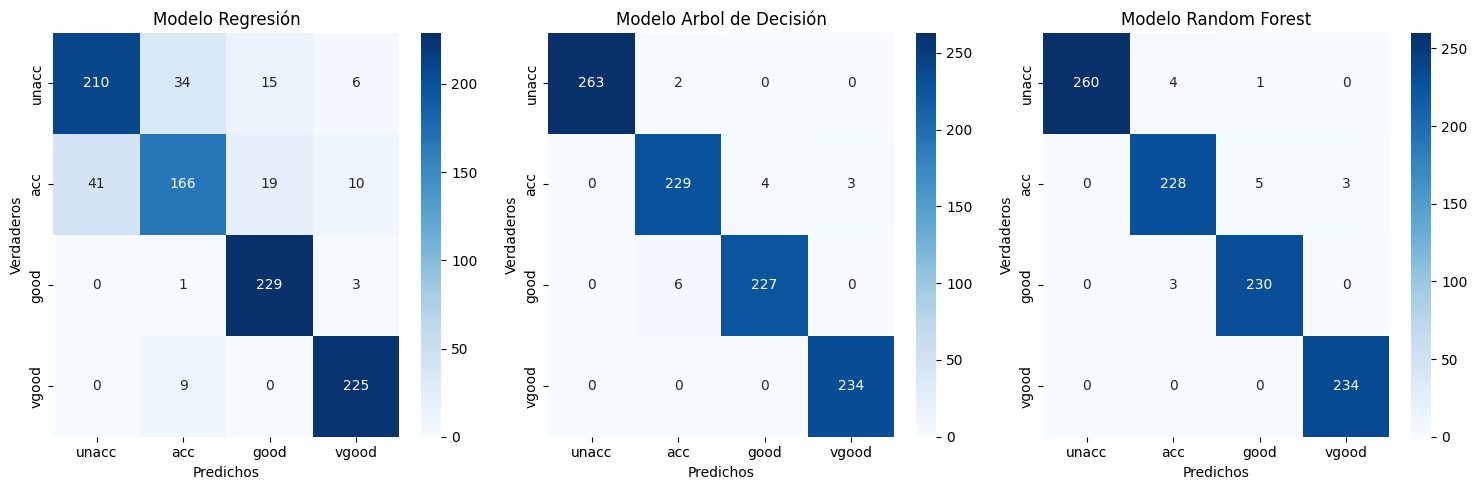

In [69]:
# Creamos un lienzo con tres subgráficos horizontales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generamos y mostramos la matriz de confusión para el modelo 1
cm1 = confusion_matrix(y_test3, yPredReg3)
sns.heatmap(cm1, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[0])
axes[0].set_xlabel('Predichos')
axes[0].set_ylabel('Verdaderos')
axes[0].set_title("Modelo Regresión")

# Generamos y mostramos la matriz de confusión para el modelo 2
cm2 = confusion_matrix(y_test3, yPredArb3)
sns.heatmap(cm2, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[1])
axes[1].set_xlabel('Predichos')
axes[1].set_ylabel('Verdaderos')
axes[1].set_title("Modelo Arbol de Decisión")

# Generamos y mostramos la matriz de confusión para el modelo 3
cm3 = confusion_matrix(y_test3, yPredRan3)
sns.heatmap(cm3, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=clases, yticklabels=clases, ax=axes[2])
axes[2].set_xlabel('Predichos')
axes[2].set_ylabel('Verdaderos')
axes[2].set_title("Modelo Random Forest")

# Ajustamos el espacio entre subgráficos
plt.tight_layout()
# Mostramos el gráfico
plt.show()

### **7.1.  Conclusiones finales**

1. Dado que los modelos de Árbol de Decisión y Bosque Aleatorio muestran un buen rendimiento general, con un alto nivel de precisión, recall y F1-score para la mayoría de las clases, y dado que los resultados han mejorado después de las técnicas de balanceo, no  nos parece necesario reentrenar los modelos en este momento.

2. Después de revisar detenidamente los resultados de nuestros modelos de Regresión Logística, Árbol de Decisión y Bosque Aleatorio, observamos que el Bosque Aleatorio y el Arbol de Decisión sobresalen como los modelos más efectivos en general.Sin embargo, hay una ligera diferencia en la precisión para la clase 0 y la clase 2 entre los dos modelos.

> - Para el Modelo Arbol de decisión, la precisión para la clase 0 es del 100%, mientras que para el Modelo de Bosque aleatorio es del 99%, lo que indica una ligera ventaja para el Modelo de arbol en términos de precisión para esta clase.

> - Para la clase 2, la precisión es del 98% para el Modelo de arbol y del 97% para el Modelo de bosque, lo que también da una ligera ventaja al Modelo de arbol en términos de precisión para esta clase.

En resumen, si se prioriza la precisión para la clase 0 y la clase 2, el Modelo de arbol de decisión sería la elección preferida, pero si se consideran otros factores, ambos modelos podrían considerarse igualmente buenos. Adicionalmente, en los reportes de clasificación proporcionados, no hay indicios claros de sobreajuste del modelo.

Esto se debe a que logró la mayor precisión, recall y puntuación F1 para la mayoría de las clases en comparación con los otros modelos. Además, alcanzó una precisión general del 98%, lo que significa que el 98% de nuestras predicciones fueron correctas, la más alta entre los tres modelos. En resumen, ambos modelos demostraron ser capaces de manejar las diferentes clases de manera efectiva y lograr un alto nivel de precisión en general, lo que lo convierte en la elección más sólida para nuestro conjunto de datos específico.